# Extracting Noun from the tweets

In [13]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import pip
pip.main(['install', 'requests'])
pip.main(["install","Twitter"])
import  twitter
from twitter import Twitter
from twitter import OAuth
import matplotlib.pyplot as plt

!python -m textblob.download_corpora
from  textblob import TextBlob



[nltk_data] Downloading package brown to C:\Users\Setia
[nltk_data]     Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Setia
[nltk_data]     Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Setia
[nltk_data]     Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Setia Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Setia
[nltk_data]     Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Setia
[nltk_data]     Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_

In [16]:
ck="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
cs="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
at="XXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
ats="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

oauth=  OAuth(at,ats,ck,cs)
api= Twitter(auth=oauth)

In [28]:
query = api.search.tweets(q='RedSparrow', count=1000)
mid=0;
df=pd.DataFrame()    
for i in range(10):
    if i==0:
        search_result= api.search.tweets(q="RedSparrow", count=100)
    else:
        search_result= api.search.tweets(q="RedSparrow", count=100, max_id=mid)
    
        dftemp= json_normalize(search_result,'statuses')
        mid= dftemp['id'].min()
        mid=mid-1
        df=df.append(dftemp,ignore_index=True)
df
    

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sat Mar 03 23:33:05 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...","{'media': [{'id': 970079178191093760, 'id_str'...",1,False,None,970079644052488195,970079644052488195,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/android"" ...",La recomendación para este fin de semana es #R...,False,"{'id': 551707309, 'id_str': '551707309', 'name..."
1,None,None,Sat Mar 03 23:31:58 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,970079364674146306,970079364674146306,...,NaN,9.696937e+17,969693724669370369,26,False,{'created_at': 'Fri Mar 02 22:10:36 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @RICHARDLNEWBY: I wrote about the unique me...,False,"{'id': 2322690577, 'id_str': '2322690577', 'na..."
2,None,None,Sat Mar 03 23:31:54 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...",NaN,0,False,None,970079346755911680,970079346755911680,...,NaN,NaN,NaN,25,False,{'created_at': 'Fri Mar 02 19:50:53 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @the_moviebob: Basically #RedSparrow posits...,False,"{'id': 61996367, 'id_str': '61996367', 'name':..."
3,None,None,Sat Mar 03 23:31:37 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...",NaN,0,False,None,970079276514054144,970079276514054144,...,NaN,NaN,NaN,1,False,{'created_at': 'Sat Mar 03 23:30:46 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @Rcinematograf: Conoce el secreto de una #R...,False,"{'id': 153164667, 'id_str': '153164667', 'name..."
4,None,None,Sat Mar 03 23:31:20 +0000 2018,"{'hashtags': [{'text': 'BlackPanther', 'indice...","{'media': [{'id': 969975821858467840, 'id_str'...",0,False,None,970079205231857665,970079205231857665,...,NaN,NaN,NaN,30,False,{'created_at': 'Sat Mar 03 16:40:32 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @THR: Weekend Box Office: #BlackPanther blo...,False,"{'id': 760093504894894080, 'id_str': '76009350..."
5,None,None,Sat Mar 03 23:31:18 +0000 2018,"{'hashtags': [{'text': 'redsparrow', 'indices'...",NaN,0,False,None,970079197954584576,970079197954584576,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",Cine On!!! Solita viendo Red Sparrow #redsparr...,False,"{'id': 56201769, 'id_str': '56201769', 'name':..."
6,None,None,Sat Mar 03 23:31:16 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...",NaN,0,False,None,970079189192896513,970079189192896513,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Jennifer Lawrence is an absolute BOSS in #RedS...,False,"{'id': 27648243, 'id_str': '27648243', 'name':..."
7,None,None,Sat Mar 03 23:31:02 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...",NaN,0,False,None,970079129956683776,970079129956683776,...,NaN,NaN,NaN,7,False,{'created_at': 'Sat Mar 03 16:58:38 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @_andrecferreira: Jennifer Lawrence is stun...,False,"{'id': 899011458, 'id_str': '899011458', 'name..."
8,None,None,Sat Mar 03 23:30:52 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,970079086419771393,970079086419771393,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","Hey, @MoviePass ...I'm your customer, not your...",True,"{'id': 1700914320, 'id_str': '1700914320', 'na..."
9,None,None,Sat Mar 03 23:30:46 +0000 2018,"{'hashtags': [{'text': 'RedSparrow', 'indices'...",NaN,2,False,None,970079064726884352,970079064726884352,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Conoce el secreto de una #RedSparrow.\n¡#Opera...,True,"{'id': 1554214933, 'id_str': '1554214933', 'na..."


In [25]:
tweettext=df['text']

wordlist=pd.DataFrame();


for t in tweettext:
    tx= TextBlob(t)
    tx.tags
    for word, tag in tx.tags:
        if tag=='NN':
            l= list(tx.noun_phrases)
            if len(l)!=0:
                wordlist= wordlist.append(l, ignore_index=True)
wordlist

,0
0,redsparrow
1,jennifer
2,redsparrow
3,jennifer
4,redsparrow
5,jennifer
6,redsparrow
7,jennifer
8,redsparrow
9,jennifer


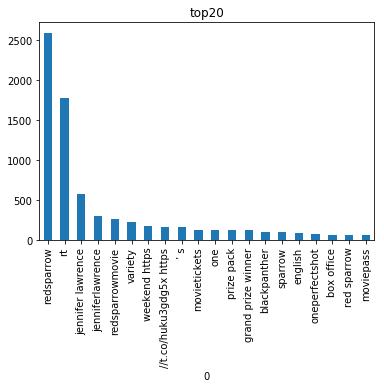

In [12]:
allword=wordlist.groupby(0).size()
top20allwords=allword.sort_values(0,ascending=False).head(20)
top20allwords.plot(kind='bar',title='top20') 
plt.show()
